# bthal dataset v6b - defining Subset1-like cells

In [1]:
%matplotlib widget
%load_ext watermark

import warnings
warnings.filterwarnings('ignore')

import os, sys, json, operator, getpass
from pathlib import Path
from datetime import datetime

import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets

%watermark --iversions

seaborn   : 0.13.0
matplotlib: 3.7.4
sys       : 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
pandas    : 2.0.3
scanpy    : 1.9.8
ipywidgets: 8.1.2
json      : 2.0.9
numpy     : 1.24.4



In [2]:
with open('/.singularity.d/labels.json') as fh:
    singularity = json.load(fh)
    
singularity['Version']

'proteus.45g'

In [4]:
now = datetime.now()
prefix = now.strftime('%Y%m%d')
print(prefix)

20240903


In [6]:
%%time
adata = sc.read('20230711_bthalcombo_v6b_lognorm_multi_annotated_scores_galore_clusters')

CPU times: user 10.1 s, sys: 4.56 s, total: 14.6 s
Wall time: 15.3 s


### Subsetoness
---

In [7]:
subset1 = [
    'HLA-DRB5', 'CHP1', 'CCND2', 'EIF1', 'RP4-673M15.1', 'YES1', 'IFT27', 'OVOS2', 'COL6A2', 'SERINC3', 'ID2', 'KCNH8', 'MRPL16', 'DHX16', 'ANKS6', 'AC092881.1', 'CPQ', 'C6orf25', 'SGIP1', 'PRR4', 'NAMPT', 'SMARCA2', 'CDKN1A', 'ZNF593', 'CD37', 'HLA-DRB9', 'PPM1H', 'BTG3', 'SDHA', 'SPRED2', 'HIST1H2BG', 'NAMPTP1', 'SMAD3', 'CAMK1D', 'BEX5', 'NR1H2', 'RBCK1', 'RASSF1', 'SPOPL', 'RIPK2', 'ARIH1', 'GBP4', 'GPR141', 'NUDT19', 'ZSWIM1', 'FAM184A', 'HBEGF', 'RP11-274A11.4', 'PREX2', 'FGFR1', 'NFIA', 'SAT1', 'CREB3', 'HIST2H2BE', 'RNF144B', 'MBD1', 'SNRK', 'ZFP36', 'UMAD1', 'RAPGEF2', 'ATP1B1', 'ZMYND8', 'ARID5A', 'BAP1', 'HLA-DPB1', 'CTNNA1', 'HLA-DQB1', 'FLOT1', 'ST3GAL1', 'LAPTM4A', 'PTGS1', 'HLA-DMB', 'FOXO3', 'GMPR', 'FAM65C', 'SORL1', 'NRIP1', 'HLA-DMA', 'CD74', 'B3GNT7', 'HIF3A', 'CDK5RAP3', 'MAFF', 'SOCS2', 'CXCL8', 'CCNH', 'FAM19A2', 'MECOM', 'ATL2', 'FOSL2', 'NFIB', 'PHTF1', 'DGKE', 'SNX9', 'ALDH1A1', 'FOXO1', 'FREM1', 'HLA-DRB1', 'CKB', 'RELB', 'FAM117A', 'CLEC9A', 'BRE', 'THEMIS2', 'MEIS1', 'HLA-E', 'NR4A1', 'PBX1', 'HLA-DRB6', 'MYCT1', 'ELMO1', 'NR4A2', 'SRGN', 'HLA-DRA', 'LIMCH1', 'MLLT3'
]

In [8]:
len(subset1)

116

In [9]:
clean1 = [x for x in subset1 if x in adata.var_names]

In [10]:
len(clean1)

108

In [11]:
sc.tl.score_genes(adata, clean1, score_name='subsetoness' )

computing score 'subsetoness'
    finished: added
    'subsetoness', score of gene set (adata.obs).
    845 total control genes are used. (0:00:01)


In [15]:
donor_cond = {
 'bthal005': 'bthal',
 'bthal006': 'bthal',
 'healthy_CTRL': 'healthy',
 'bthal010': 'bthal',
 'bthal009': 'bthal',
 'bthal007': 'bthal',
 'bthal008': 'bthal',
 'P185': 'healthy',
 'P181': 'healthy',
 'P257': 'healthy',
 'paedBM1': 'healthy',
 'paedBM2': 'healthy'    
}

In [16]:
adata.obs['condition'] = adata.obs.donor.map(donor_cond)

### Plots
---

<Axes: title={'center': 'bthal'}, xlabel='UMAP1', ylabel='UMAP2'>

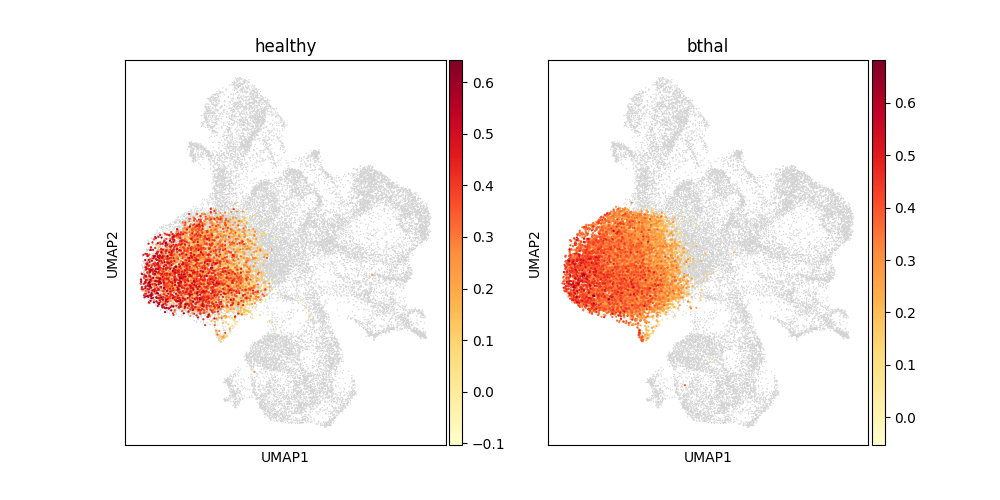

In [23]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

sc.pl.embedding(adata, basis='umap', ax=ax[0], show=False)
sc.pl.embedding(adata[ np.logical_and(adata.obs['lineage.annot'] == 'HSC/MPP', adata.obs.condition == 'healthy') ],
                basis='umap', color='subsetoness', cmap='YlOrRd', ax=ax[0], show=False, title='healthy', s=10)

sc.pl.embedding(adata, basis='umap', ax=ax[1], show=False)
sc.pl.embedding(adata[ np.logical_and(adata.obs['lineage.annot'] == 'HSC/MPP', adata.obs.condition == 'bthal') ],
                basis='umap', color='subsetoness', cmap='YlOrRd', ax=ax[1], show=False, title='bthal', s=10)

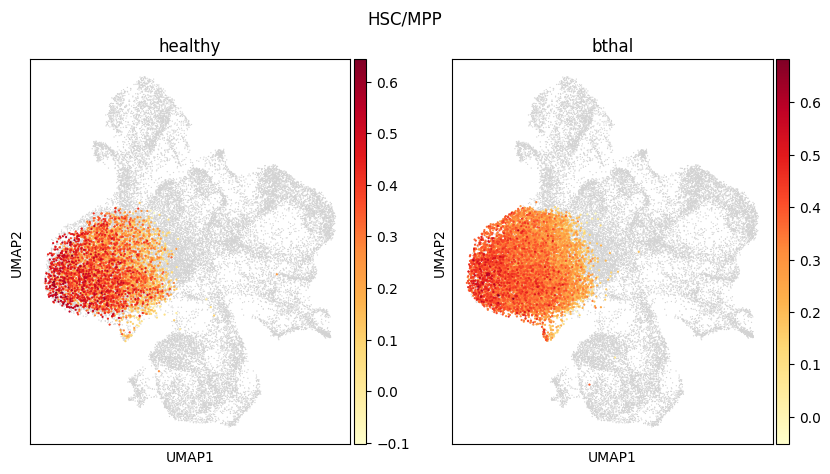

In [24]:
plt.suptitle('HSC/MPP')
plt.gcf()

In [25]:
selection = adata[ adata.obs['lineage.annot'] == 'HSC/MPP' ].copy()

In [26]:
selection.obs.groupby(['condition']).size()

condition
bthal      9368
healthy    4730
dtype: int64

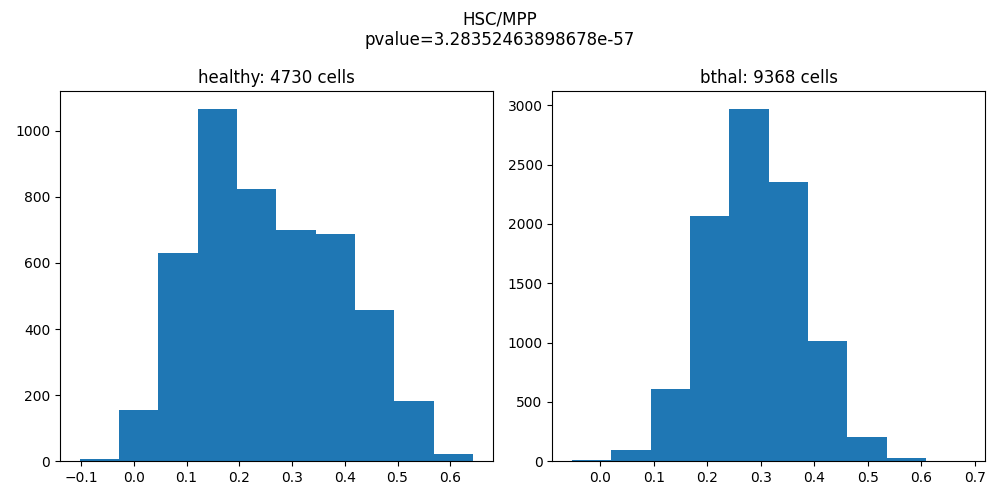

In [32]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(selection[ selection.obs.condition == 'healthy' ].obs.subsetoness)

ax[1].hist(selection[ selection.obs.condition == 'bthal' ].obs.subsetoness)

ax[0].set_title('healthy: 4730 cells')
ax[1].set_title('bthal: 9368 cells')

fig.suptitle('HSC/MPP\npvalue=3.28352463898678e-57')

plt.tight_layout()

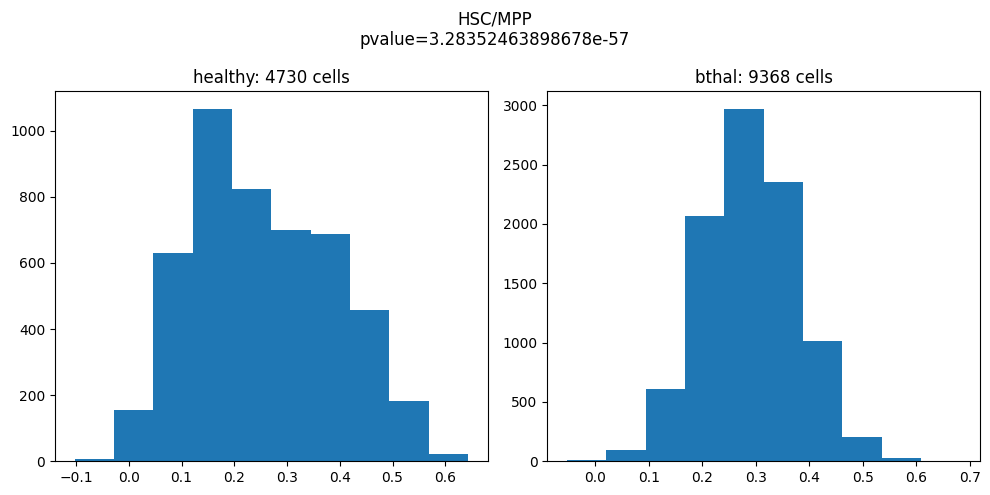

In [34]:
plt.gcf()

In [29]:
from scipy import stats

res = stats.ttest_ind(selection[ selection.obs.condition == 'healthy' ].obs.subsetoness, 
                      selection[ selection.obs.condition == 'bthal' ].obs.subsetoness, 
                      equal_var=False)

In [31]:
res

Ttest_indResult(statistic=-16.090866673415018, pvalue=3.28352463898678e-57)

In [41]:
selection[ selection.obs.condition == 'healthy' ].obs.subsetoness.quantile([0.25, 0.5, 0.75])

0.25    0.148197
0.50    0.237652
0.75    0.362249
Name: subsetoness, dtype: float64

In [42]:
selection[ selection.obs.condition == 'bthal' ].obs.subsetoness.quantile([0.25, 0.5, 0.75])

0.25    0.229575
0.50    0.288847
0.75    0.348935
Name: subsetoness, dtype: float64

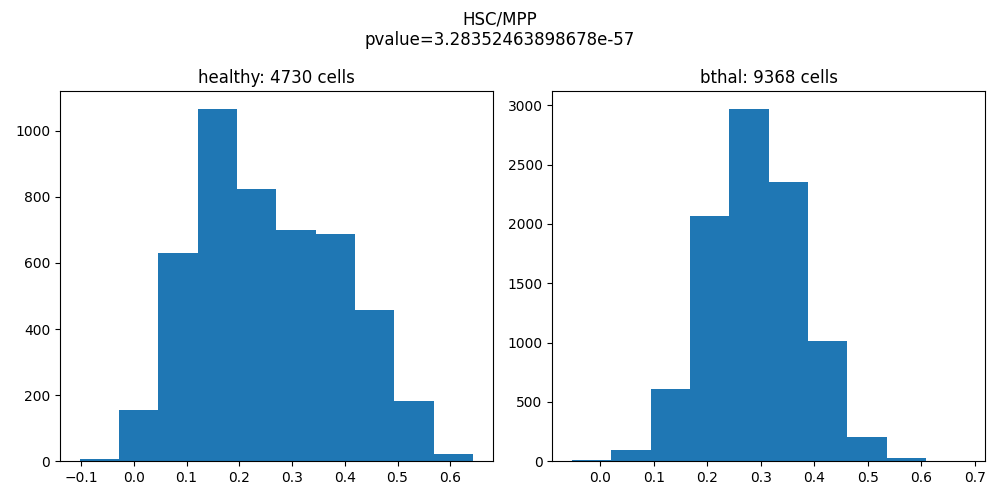

In [43]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(selection[ selection.obs.condition == 'healthy' ].obs.subsetoness)

ax[1].hist(selection[ selection.obs.condition == 'bthal' ].obs.subsetoness)

ax[0].set_title('healthy: 4730 cells')
ax[1].set_title('bthal: 9368 cells')

fig.suptitle('HSC/MPP\npvalue=3.28352463898678e-57')

plt.tight_layout()

In [46]:
selection[ selection.obs.condition == 'healthy' ].obs.subsetoness.quantile([0.25, 0.5, 0.75]).values

array([0.14819706, 0.23765191, 0.36224885])

In [49]:
values = selection[ selection.obs.condition == 'healthy' ].obs.subsetoness.quantile([0.25, 0.5, 0.75]).values

for v in values:
    ax[0].axvline(v, color='red', linestyle='--')

In [50]:
values = selection[ selection.obs.condition == 'bthal' ].obs.subsetoness.quantile([0.25, 0.5, 0.75]).values

for v in values:
    ax[1].axvline(v, color='red', linestyle='--')

In [51]:
values

array([0.2295748 , 0.28884748, 0.3489348 ])

In [48]:
ax[0].axvline(0.14819706, color='red', linestyle='--')

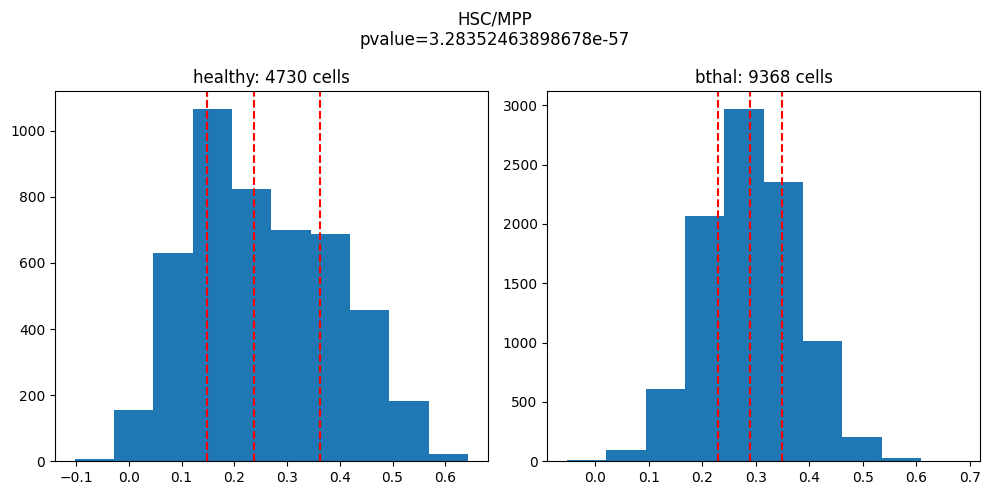

In [52]:
plt.gcf()

### Defining Subset1 cell set
---

In [53]:
subset1 = selection[selection.obs.subsetoness > 0.3].copy()

In [56]:
subset1.obs.groupby(['condition', 'v6_leiden.20.0_annot_CB10']).size().unstack()

v6_leiden.20.0_annot_CB10  00_HSC/MPP2  04_HSC/MPP1  05_HSC/MPP3  11_HSC/MPP4
condition                                                                    
bthal                              240         1280         2628           80
healthy                            108          464         1170            8

In [57]:
subset1.obs.groupby(['condition', 'v6_leiden.20.0_annot_CB45']).size().unstack()

v6_leiden.20.0_annot_CB45   HSC  LMPP  MPP-MkEry  MPP-MyLy
condition                                                 
bthal                      3514    42        370       302
healthy                    1396    11        131       212

In [92]:
grouping = 'v6_leiden.20.0_annot_CB10'

for c in ['00_HSC/MPP2', 	'04_HSC/MPP1', 	'05_HSC/MPP3', 	'11_HSC/MPP4']:

    
    res3 = stats.ttest_ind(subset1[ np.logical_and(subset1.obs.condition == 'healthy',
                          subset1.obs[grouping] == c) ].obs.subsetoness, 
                      subset1[ np.logical_and(subset1.obs.condition == 'bthal',
                          subset1.obs[grouping] == c) ].obs.subsetoness, 
                      equal_var=False)
    print(c+ ' p-value:' + str(res3.pvalue) )

00_HSC/MPP2 p-value:1.2592394965662688e-05
04_HSC/MPP1 p-value:5.137612843684934e-38
05_HSC/MPP3 p-value:2.3054024341816292e-55
11_HSC/MPP4 p-value:0.8186981058454023


In [93]:
grouping = 'v6_leiden.20.0_annot_CB45'

for c in ['HSC', 	'LMPP', 	'MPP-MkEry', 	'MPP-MyLy']:
    
    res3 = stats.ttest_ind(subset1[ np.logical_and(subset1.obs.condition == 'healthy',
                          subset1.obs[grouping] == c) ].obs.subsetoness, 
                      subset1[ np.logical_and(subset1.obs.condition == 'bthal',
                          subset1.obs[grouping] == c) ].obs.subsetoness, 
                      equal_var=False)
    print(c+ ' p-value:' + str(res3.pvalue) )

HSC p-value:2.2339442314663856e-75
LMPP p-value:0.6001835049274004
MPP-MkEry p-value:2.6140915613136903e-10
MPP-MyLy p-value:2.1475072429448223e-10


In [94]:
grouping = 'v6_leiden.20.0_annot_CB10'

for c in ['00_HSC/MPP2', 	'04_HSC/MPP1', 	'05_HSC/MPP3', 	'11_HSC/MPP4']:

    
    res3 = stats.ttest_ind(selection[ np.logical_and(selection.obs.condition == 'healthy',
                          selection.obs[grouping] == c) ].obs.subsetoness, 
                      selection[ np.logical_and(selection.obs.condition == 'bthal',
                          selection.obs[grouping] == c) ].obs.subsetoness, 
                      equal_var=False)
    print(c+ ' p-value:' + str(res3.pvalue) )

00_HSC/MPP2 p-value:0.002332159792574496
04_HSC/MPP1 p-value:0.2936584974878481
05_HSC/MPP3 p-value:1.2348810087496445e-63
11_HSC/MPP4 p-value:0.8126926797882422


In [95]:
grouping = 'v6_leiden.20.0_annot_CB45'

for c in ['HSC', 	'LMPP', 	'MPP-MkEry', 	'MPP-MyLy']:

    
    res3 = stats.ttest_ind(selection[ np.logical_and(selection.obs.condition == 'healthy',
                          selection.obs[grouping] == c) ].obs.subsetoness, 
                      selection[ np.logical_and(selection.obs.condition == 'bthal',
                          selection.obs[grouping] == c) ].obs.subsetoness, 
                      equal_var=False)
    print(c+ ' p-value:' + str(res3.pvalue) )

HSC p-value:1.1122882920185715e-23
LMPP p-value:8.605971251009709e-12
MPP-MkEry p-value:1.587495956695283e-15
MPP-MyLy p-value:3.469732774743439e-25


In [58]:
from scipy import stats

res2 = stats.ttest_ind(selection[ np.logical_and(selection.obs.condition == 'healthy',
                          selection.obs['v6_leiden.20.0_annot_CB45'] == 'MPP-MkEry') ].obs.subsetoness, 
                      selection[ np.logical_and(selection.obs.condition == 'bthal',
                          selection.obs['v6_leiden.20.0_annot_CB45'] == 'MPP-MkEry') ].obs.subsetoness, 
                      equal_var=False)

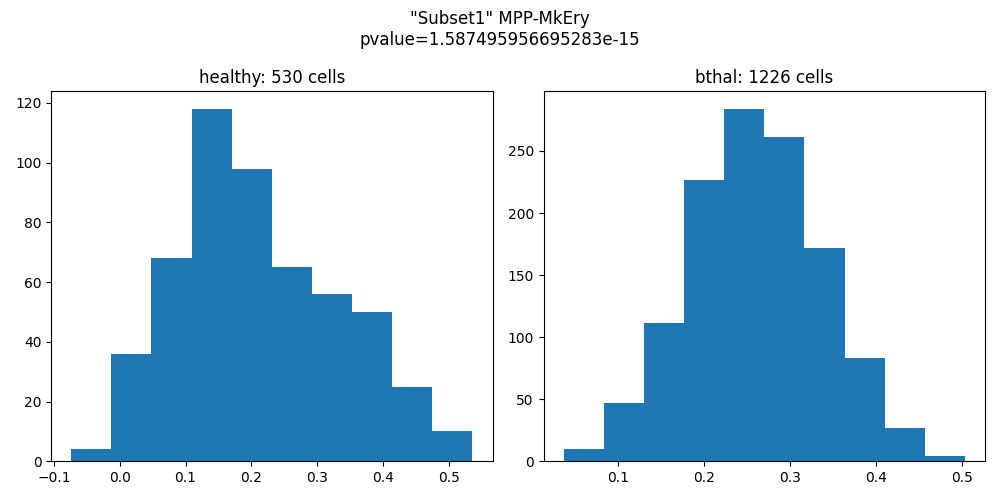

In [79]:
from scipy import stats

set_a = selection[ np.logical_and(selection.obs.condition == 'healthy',
                          selection.obs['v6_leiden.20.0_annot_CB45'] == 'MPP-MkEry') ].obs.subsetoness

set_b = selection[ np.logical_and(selection.obs.condition == 'bthal',
                          selection.obs['v6_leiden.20.0_annot_CB45'] == 'MPP-MkEry') ].obs.subsetoness

res2 = stats.ttest_ind(set_a, set_b, equal_var=False)


fig,ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(set_a)
ax[1].hist(set_b)

ax[0].set_title('healthy: '+str(len(set_a))+' cells')
ax[1].set_title('bthal: '+str(len(set_b))+' cells')

fig.suptitle('"Subset1" MPP-MkEry\npvalue='+str(res2.pvalue))

plt.tight_layout()

In [80]:
values = set_a.quantile([0.25, 0.5, 0.75]).values

for v in values:
    ax[0].axvline(v, color='red', linestyle='--')
    ax[0].text(v, 0.99, round(v, 5), color='r', ha='right', va='top', rotation=90,
            transform=ax[0].get_xaxis_transform())

In [81]:
values = set_b.quantile([0.25, 0.5, 0.75]).values

for v in values:
    ax[1].axvline(v, color='red', linestyle='--')
    ax[1].text(v, 0.99, round(v, 5), color='r', ha='right', va='top', rotation=90,
            transform=ax[1].get_xaxis_transform())

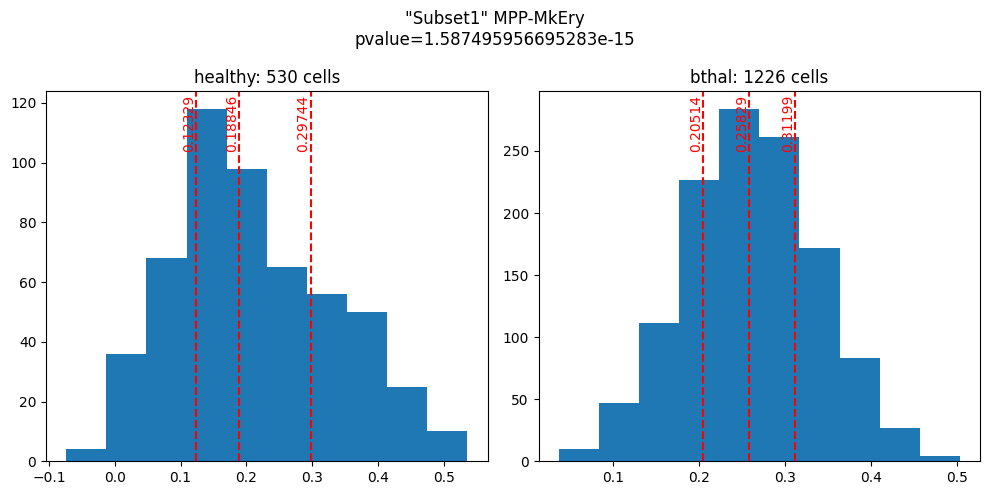

In [82]:
plt.gcf()

In [83]:
subset1

AnnData object with n_obs × n_vars = 5978 × 20098
    obs: 'library', 'donor', 'population', 'tissue', 'xample', 'doublet_scores', 'percent.mt', 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'seurat_clusters', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.annot.score', 'predicted.annot', 'mapping.score', 'mapping_error_score', 'mapping_error_QC', 'predicted_CellType', 'predicted_CellType_prob', 'predicted_Pseudotime', 'GMP_score', 'MLP_score', 'MEP_score', 'HSC_score', 'Ery_priming_score', 'Meg_priming_score', 'BM_LT_HSC_TOP100', 'BM_ST_HSC_TOP100', 'human_active_HSC_TOP100', 'human_dormant_HSC_TOP100', 'Repopulation_signature', 'BM-type_score', 'SPL-type_score', 'mast_score', 'v6_leiden.20.0', 'v6_leiden.20.0_annot_CB10', 'v6_leiden.20.0_annot_CB45', 'lineage.annot', 'lineage.annot.granular', 'lineage.andy', 'lineage.andy.granular', 'subsetoness', 'condition'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    

In [84]:
%%time
sc.write('20240903_Subset1_like_cells', subset1)

CPU times: user 7.97 s, sys: 137 ms, total: 8.1 s
Wall time: 10.3 s


# END